<a href="https://colab.research.google.com/github/larissaAlmeida98/Python/blob/main/FIM_Exerc%C3%ADcios1_Trabalhando_com_o_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalhando com Pandas

Importe, para um dataframe Pandas, o conteúdo do arquivo jogadores.csv

Mostre o conteúdo do dataframe criado

In [ ]:
import pandas as pd

jogo = pd.read_csv('jogadores.csv', encoding = 'utf-8', delimiter = ';')
jogo

,jogador,time,posicao,salario
0,Everson,Atlético,Goleiro,150000.0
1,Incrível Hulk,Atlético,Atacante,850000.0
2,Fábio,Cruzeiro,Goleiro,100000.0
3,Edu,Cruzeiro,Atacante,150000.0
4,Diego Tardeli,NaN,Atacante,NaN


Remova do dataframe os jogadores que possuem o salário nulo

In [ ]:
jogo.dropna()
jogo.dropna(inplace = True)

jogo

,jogador,time,posicao,salario,salario_anual
0,Everson,Atlético,Goleiro,150000.0,1800000.0
1,Incrível Hulk,Atlético,Atacante,850000.0,10200000.0
2,Fábio,Cruzeiro,Goleiro,100000.0,1200000.0
3,Edu,Cruzeiro,Atacante,150000.0,1800000.0


Crie, no dataframe, uma nova coluna, salario_anual, contendo o salário anual de todos os jogadores

In [ ]:
import numpy as np

jogo['salario_anual'] = round(jogo['salario']*12)

jogo

,jogador,time,posicao,salario,salario_anual
0,Everson,Atlético,Goleiro,150000.0,1800000.0
1,Incrível Hulk,Atlético,Atacante,850000.0,10200000.0
2,Fábio,Cruzeiro,Goleiro,100000.0,1200000.0
3,Edu,Cruzeiro,Atacante,150000.0,1800000.0
4,Diego Tardeli,NaN,Atacante,NaN,NaN


Atualize o nome dos jogadores, passando todos os caracteres para maiúsculo

In [ ]:
jogo = pd.read_csv('jogadores.csv', encoding = 'utf-8', delimiter = ';')
jogo['jogador'] = jogo.jogador.str.upper()

jogo

,jogador,time,posicao,salario
0,EVERSON,Atlético,Goleiro,150000.0
1,INCRÍVEL HULK,Atlético,Atacante,850000.0
2,FÁBIO,Cruzeiro,Goleiro,100000.0
3,EDU,Cruzeiro,Atacante,150000.0
4,DIEGO TARDELI,NaN,Atacante,NaN


Mostre os dados estatísticos dos valores numéricos do dataframe (comando describe).

In [ ]:
import pandas as pd

jogo = pd.read_csv('jogadores.csv', encoding = 'utf-8', delimiter = ';')
jogo.describe()


,salario
count,4.00000
mean,312500.00000
std,359107.69044
min,100000.00000
25%,137500.00000
50%,150000.00000
75%,325000.00000
max,850000.00000


Descreva as informações sobre os salários dos jogadores, obtidas através desses dados.

Faça consultas no dataframe para exibir:
- Nome e time dos jogadores que possuem salário acima de R$ 200000,00
- Nome e salário dos jogadores dos times de Minas Gerais (estado MG)
- Nome e time dos jogadores cujo nome contenha a letra 'u'
- Nome, salário e time dos jogadores, ordenados pelo salário em ordem decrescente

In [ ]:
import pandas as pd

jogo = pd.read_csv('jogadores.csv', encoding = 'utf-8', delimiter = ';')

salario = jogo['salario'] > 200000
print(jogo.loc[salario, ['jogador', 'time']])

         jogador      time
1  Incrível Hulk  Atlético


In [ ]:

minas_gerais = jogo['time'] == 'Cruzeiro'
print(jogo.loc[minas_gerais, ['jogador', 'salario']])

  jogador   salario
2   Fábio  100000.0
3     Edu  150000.0


In [ ]:
letra_U = jogo['jogador'].str.contains('u')
print(jogo.loc[letra_U, ['jogador', 'time']])

         jogador      time
1  Incrível Hulk  Atlético
3            Edu  Cruzeiro


In [ ]:
salario_decrescente = jogo.sort_values(by='salario', ascending=False)
print(salario_decrescente[['jogador', 'salario', 'time']])

         jogador   salario      time
1  Incrível Hulk  850000.0  Atlético
0        Everson  150000.0  Atlético
3            Edu  150000.0  Cruzeiro
2          Fábio  100000.0  Cruzeiro
4  Diego Tardeli       NaN       NaN


- Nome, salário e time dos jogadores, ordenados pelo nome do time em ordem crescente, e em seguida pelo salário em ordem decrescente


In [ ]:
nome_crescente = jogo.sort_values(by=['time', 'salario'], ascending=[True, False])
print(nome_crescente[['jogador', 'salario', 'time']])



         jogador   salario      time
1  Incrível Hulk  850000.0  Atlético
0        Everson  150000.0  Atlético
3            Edu  150000.0  Cruzeiro
2          Fábio  100000.0  Cruzeiro
4  Diego Tardeli       NaN       NaN


- A quantidade de jogadores por time


In [ ]:
import pandas as pd

jogo = pd.read_csv('jogadores.csv', encoding = 'utf-8', delimiter = ';')

jogo['time'].value_counts()


Atlético    2
Cruzeiro    2
Name: time, dtype: int64


- A média salarial por time

In [ ]:
jogo.groupby(['time']).mean().round()


<ipython-input-47-798f0d2e4e25>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  jogo.groupby(['time']).mean().round()


,salario
time,
Atlético,500000.0
Cruzeiro,125000.0


Exporte o conteúdo do dataframe para um novo arquivo CSV, nomeado novo_time.csv

In [ ]:
jogo.to_csv('Novo_time.csv', encoding = 'utf-8', index = False)

Gere um gráfico de barras exibindo a quantidade de jogadores por posição

<Axes: xlabel='posicao'>

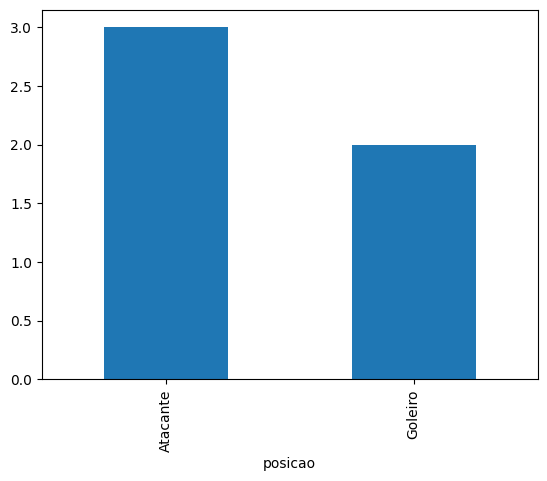

In [ ]:
jogo.groupby('posicao').size().plot(kind='bar')